# CS109B - Milestone 1
Authors: Stephanie Von Klot-Heydenfeldt, Roberto Vitillo, Alessio Placitelli

In [1]:
import itertools as it
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd

sys.path.append(os.path.realpath('../lib'))

from tmdbw import TMDBW
from imdbw import IMDBW
from pandas.io.json import json_normalize
from skimage.viewer import ImageViewer

%matplotlib inline

## Setup the scraper APIs
We build an external library to do that, so we just need to instantiate them.

In [2]:
tmdb = TMDBW("<API KEY>")
imdb = IMDBW()

## Look up the favourite movie
We start by searching IMDB for the favourite movie, *"A Space Odyssey"*. We use the returned movie id to look up the same movie in TMDB.

In [3]:
matching_titles = imdb.search_movie("A Space Odyssey")
matching_titles

{'0062622': u'2001: A Space Odyssey (1968)',
 '0312305': u'Quantum Quest: A Cassini Space Odyssey (2010)',
 '0353835': u'ONE: A Space Odyssey (2001)',
 '0395417': u'Space Odyssey: Voyage to the Planets (2004) (TV)',
 '0866909': u'"2001: A Space Odyssey (2005) (TV Episode)  - Season 1 | Episode 4  - Movies That Shook the World" (2005)',
 '1439189': u'"A Space Odyssey (1977) (TV Episode)  - Season 1 | Episode 7  - We\'ve Got Each Other" (1977)',
 '1775384': u'"2001: A Space Odyssey (2008) (TV Episode)  - Season 1 | Episode 3  - 5 Second Movies" (2007)',
 '2124049': u'Space Odyssey (1981) (VG)',
 '2177901': u'"Auction" A Space Odyssey (1994)',
 '2395695': u'"Cosmos: A Spacetime Odyssey" (2014) (mini)',
 '2805022': u'"2001: A Space Odyssey (2013) (TV Episode)  - Season 1 | Episode 8  - Cute Girl Movie Review" (2013)',
 '3044214': u'An Arctic Space Odyssey (2014)',
 '3226900': u'"2001: A Space Odyssey #1 (2013) (TV Episode)  - Season 6 | Episode 42  - Atop the Fourth Wall" (2008)',
 '376112

We want the one from 1968, so we note down its movie id which is **0062622**. Now that we know its id, let's fetch the data on IMDB and TMDB.

In [4]:
sample_movie = {}
sample_movie['imdb'] = imdb.get_movie("0062622")
sample_movie['tmdb'] = tmdb.get_movie("tt0062622")

Show the posters and the genres fetched from the two databases.

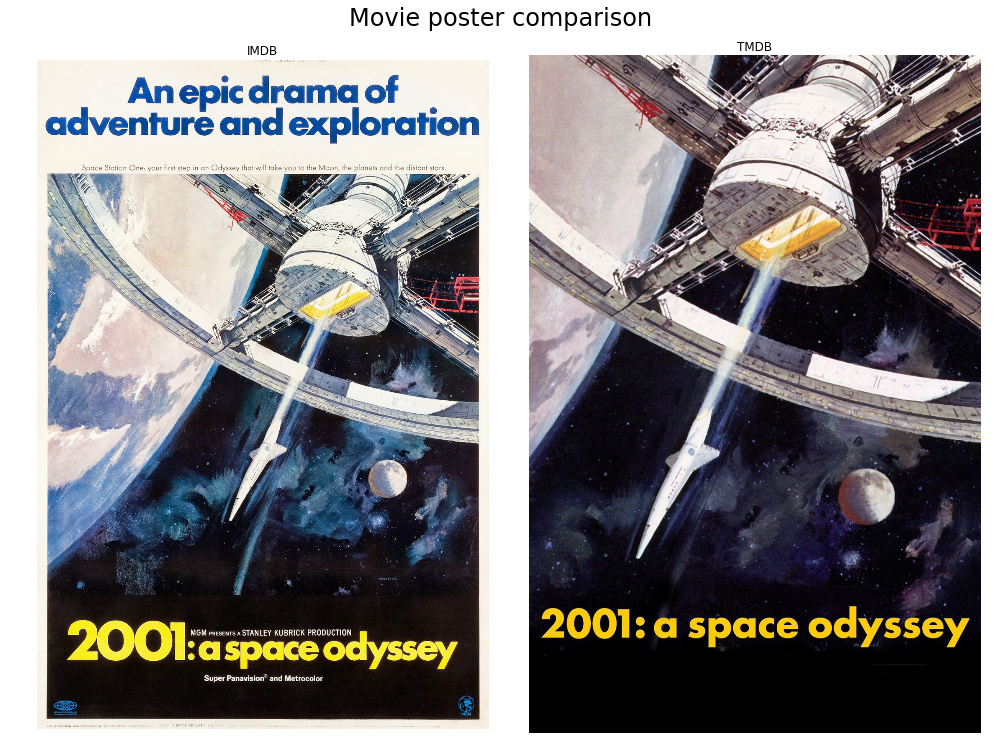

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 13))
f.suptitle('Movie poster comparison', fontsize=24)

ax1.imshow(sample_movie['imdb']['poster'])
ax1.set_title('IMDB')
ax1.axis('off')
ax2.imshow(sample_movie['tmdb']['poster'])
ax2.set_title('TMDB')
ax2.axis('off')

f.tight_layout()
plt.subplots_adjust(top=1.12)
plt.show()

Also check the differences between the reported *genre* information from both databases.

In [6]:
sample_movie['imdb']['genres']

[u'Adventure', u'Sci-Fi']

In [7]:
sample_movie['tmdb']['genres']

[u'Science Fiction', u'Mystery', u'Adventure']

By looking at both the posters and the genres metadata, we can see that:

- even if they come from the same movie, and they represent the same thing, the posters are different: the *IMDB* one contains the title, some actor information and additional textual cues about the movie while the *TMDB* one only reports the movie title;
- the genres reported from the two databases are similar and related, but different.

### Open questions

- Do we need to normalize poster images?
- Is there any interesting feature descriptor for movie poster images that can handle textual variations?
- Are poster images different between world regions? Do we need to care about that?
- How can we normalize the genres reported by the two systems? Do we need to? Can't we simply rely on the genre information by one of them?

## Get the top 100 movies in 2016
We feed this data into a pandas dataframe for convenience and ease of plotting.

In [8]:
df_tmdb_2016 = pd.DataFrame()

for m in tmdb.get_top_movies(2016, limit=100):
    df_tmdb_2016 = df_tmdb_2016.append(json_normalize(m))

In [9]:
# Plot the head of the table.
df_tmdb_2016.head(2)

,adult,budget,genres,imdb_id,languages,overview,poster,release_date,revenue,runtime,tagline,title,tmdb_id
0,False,75000000,"[Animation, Comedy, Drama, Family, Music]",tt3470600,[en],A koala named Buster recruits his best friend ...,"[[[121, 98, 118], [112, 89, 109], [106, 84, 10...",2016-11-23,601303829,108,Auditions begin 2016.,Sing,335797
0,False,180000000,"[Adventure, Action, Fantasy]",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...","[[[190, 187, 168], [190, 187, 168], [190, 187,...",2016-11-16,809342332,133,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,259316


## Open questions

- Can we also get other useful features from IMDB? (e.g. cast?)
- Should we create a merged data frame?
- Do we need to keep the poster here?

## Fetch the top 10 movies in 2016
We want to see how the genres reported from the different data source fit together.

In [10]:
# We already have the top 100 from the previous step.
# Get the first 10 movies from TMDB and get the related data from
# IMDB.
tmdb_top10_2016 = df_tmdb_2016.head(10)
imdb_top10_2016 = pd.DataFrame()

for imdb_id in tmdb_top10_2016["imdb_id"].values:
    # TMDB stores the IMDB ids with a "tt" prefix.
    if imdb_id.startswith("tt"):
        imdb_id = imdb_id[2:]

    imdb_info = imdb.get_movie(imdb_id)
    imdb_top10_2016 = imdb_top10_2016.append(json_normalize(imdb_info))

In [11]:
tmdb_top10_2016.head(2)

,adult,budget,genres,imdb_id,languages,overview,poster,release_date,revenue,runtime,tagline,title,tmdb_id
0,False,75000000,"[Animation, Comedy, Drama, Family, Music]",tt3470600,[en],A koala named Buster recruits his best friend ...,"[[[121, 98, 118], [112, 89, 109], [106, 84, 10...",2016-11-23,601303829,108,Auditions begin 2016.,Sing,335797
0,False,180000000,"[Adventure, Action, Fantasy]",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...","[[[190, 187, 168], [190, 187, 168], [190, 187,...",2016-11-16,809342332,133,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,259316


In [12]:
imdb_top10_2016.head(2)

,adult,assistant_directors,cast,directors,genres,imdb_id,languages,overview,plot,poster,producers,release_date,title,visual_effects,writers
0,False,[],"[Matthew McConaughey, Reese Witherspoon, Seth ...","[Garth Jennings, Christophe Lourdelet]","[Animation, Comedy, Family, Music]",tt3470600,"[English, Japanese, Ukrainian]","In a city of humanoid animals, a hustling thea...",[Set in a world like ours but entirely inhabit...,"[[[81, 76, 99], [81, 72, 93], [96, 77, 105], [...","[Janet Healy, Brett Hoffman, Igor Khait, Chris...",2016,Sing,"[Richard Adenot, Thomas Assié, Marie Barallon,...",[Garth Jennings]
0,False,"[Tom Brewster, Rory Broadfoot, Tom Browne, Gle...","[Eddie Redmayne, Sam Redford, Scott Goldman, T...",[David Yates],"[Adventure, Family, Fantasy]",tt3183660,"[English, Central Khmer]",The adventures of writer Newt Scamander in New...,[Holding a mysterious leather suitcase in his ...,"[[[145, 155, 154], [147, 157, 156], [149, 159,...","[Neil Blair, David Heyman, Steve Kloves, Tim L...",2016,Fantastic Beasts and Where to Find Them,"[Ian Abbott, Nadarajan Usha Abheesh, Christian...",[J.K. Rowling]


Merge the data from IMDB and TMDB in a single dataframe.

In [13]:
top_10_genres = pd.merge(tmdb_top10_2016, imdb_top10_2016, how='inner', on="imdb_id",
                         suffixes=('_tmdb', '_imdb'), indicator=False)
top_10_genres.head(2)

,adult_tmdb,budget,genres_tmdb,imdb_id,languages_tmdb,overview_tmdb,poster_tmdb,release_date_tmdb,revenue,runtime,...,genres_imdb,languages_imdb,overview_imdb,plot,poster_imdb,producers,release_date_imdb,title_imdb,visual_effects,writers
0,False,75000000,"[Animation, Comedy, Drama, Family, Music]",tt3470600,[en],A koala named Buster recruits his best friend ...,"[[[121, 98, 118], [112, 89, 109], [106, 84, 10...",2016-11-23,601303829,108,...,"[Animation, Comedy, Family, Music]","[English, Japanese, Ukrainian]","In a city of humanoid animals, a hustling thea...",[Set in a world like ours but entirely inhabit...,"[[[81, 76, 99], [81, 72, 93], [96, 77, 105], [...","[Janet Healy, Brett Hoffman, Igor Khait, Chris...",2016,Sing,"[Richard Adenot, Thomas Assié, Marie Barallon,...",[Garth Jennings]
1,False,180000000,"[Adventure, Action, Fantasy]",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...","[[[190, 187, 168], [190, 187, 168], [190, 187,...",2016-11-16,809342332,133,...,"[Adventure, Family, Fantasy]","[English, Central Khmer]",The adventures of writer Newt Scamander in New...,[Holding a mysterious leather suitcase in his ...,"[[[145, 155, 154], [147, 157, 156], [149, 159,...","[Neil Blair, David Heyman, Steve Kloves, Tim L...",2016,Fantastic Beasts and Where to Find Them,"[Ian Abbott, Nadarajan Usha Abheesh, Christian...",[J.K. Rowling]


## How are genres different for the top 10 movies?

In [14]:
top_10_genres[["imdb_id", "title_tmdb", "genres_tmdb", "genres_imdb"]]

,imdb_id,title_tmdb,genres_tmdb,genres_imdb
0,tt3470600,Sing,"[Animation, Comedy, Drama, Family, Music]","[Animation, Comedy, Family, Music]"
1,tt3183660,Fantastic Beasts and Where to Find Them,"[Adventure, Action, Fantasy]","[Adventure, Family, Fantasy]"
2,tt2277860,Finding Dory,"[Adventure, Animation, Comedy, Family]","[Animation, Adventure, Comedy, Family]"
3,tt1431045,Deadpool,"[Action, Adventure, Comedy, Romance]","[Action, Adventure, Comedy, Romance, Sci-Fi]"
4,tt3748528,Rogue One: A Star Wars Story,"[Action, Drama, Science Fiction, War]","[Action, Adventure, Sci-Fi]"
5,tt1211837,Doctor Strange,"[Action, Adventure, Fantasy, Science Fiction]","[Action, Adventure, Fantasy, Sci-Fi]"
6,tt2543164,Arrival,"[Drama, Science Fiction]","[Drama, Mystery, Sci-Fi, Thriller]"
7,tt3498820,Captain America: Civil War,"[Action, Science Fiction]","[Action, Adventure, Sci-Fi]"
8,tt3717252,Underworld: Blood Wars,"[Action, Horror]","[Action, Horror]"
9,tt3741834,Lion,[Drama],"[Biography, Drama]"


This table highlights a few challenges with the genres representation:

- The genres might be spelled differently (e.g. "Sci-Fi" vs "Science Fiction").
- The genres vectors might have different lengths (e.g. [Drama] vs [Biography, Drama]).
- Even if it's not represented in this sample, the genres might have different semantics.
- Genre vectors often contain more than one genre and it might be important to use all of them to implement a good model.

To overcome this problems and normalize the genres to ease the learning process, we could employ different strategies, such as:

- Merge the genre vectors from the different data sources and merge similar genres by using some similarity measure (e.g. semantic similarity using NLP).
- Using some heuristics extracted from the data (e.g. collapse Science Fiction into Sci-Fi).
- Use the genre vector from the source that contains the most informative content.
- Create a hierarchy of genres and only assign the genre of the highest level in the hierarchy (that's probably the poorest).
- Create a new genre definition that incorporates the clusters we see and focus on these.

## Analyse the genres in the TMDB dataset
Let's look at how the genres behave in a single source. We will address both sources once we fix the discrepancies between the genre vectors.

In [15]:
# Drop the poster info to speed up all the computations.
tmdb_no_posters = df_tmdb_2016.drop(['poster'], axis=1)
tmdb_no_posters.head(2)

,adult,budget,genres,imdb_id,languages,overview,release_date,revenue,runtime,tagline,title,tmdb_id
0,False,75000000,"[Animation, Comedy, Drama, Family, Music]",tt3470600,[en],A koala named Buster recruits his best friend ...,2016-11-23,601303829,108,Auditions begin 2016.,Sing,335797
0,False,180000000,"[Adventure, Action, Fantasy]",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...",2016-11-16,809342332,133,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,259316


Use one-hot encoding on the genres. This will make plotting easier.

In [16]:
# need to first create string from the list pf genres for this to work
tmdb_onehot = tmdb_no_posters.copy()
tmdb_onehot['genres'] = tmdb_onehot['genres'].apply(lambda x: ', '.join(x))

# This should use tmdb.get_genres()
GENRE_LIST = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
    'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
    'TV Movie', 'Thriller', 'War', 'Western'
]

for i, genr in enumerate(GENRE_LIST):
    tmdb_onehot[genr] =  tmdb_onehot['genres'].str.contains(genr)*1                 

tmdb_onehot.head(2)

,adult,budget,genres,imdb_id,languages,overview,release_date,revenue,runtime,tagline,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,75000000,"Animation, Comedy, Drama, Family, Music",tt3470600,[en],A koala named Buster recruits his best friend ...,2016-11-23,601303829,108,Auditions begin 2016.,...,0,0,1,0,0,0,0,0,0,0
0,False,180000000,"Adventure, Action, Fantasy",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...",2016-11-16,809342332,133,From J.K. Rowling's wizarding world.,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print tmdb_onehot.describe()

             budget       revenue     runtime        tmdb_id      Action  \
count  1.000000e+02  1.000000e+02  100.000000     100.000000  100.000000   
mean   7.213400e+07  2.402771e+08  113.880000  292742.320000    0.320000   
std    6.361114e+07  2.778383e+08   15.532488   79830.258867    0.468826   
min    0.000000e+00  0.000000e+00   83.000000   43074.000000    0.000000   
25%    2.000000e+07  3.975482e+07  103.000000  268845.500000    0.000000   
50%    4.675000e+07  1.554024e+08  113.500000  308398.500000    0.000000   
75%    1.162500e+08  3.221310e+08  123.250000  337947.000000    1.000000   
max    2.500000e+08  1.153304e+09  161.000000  416252.000000    1.000000   

        Adventure   Animation      Comedy       Crime  Documentary  \
count  100.000000  100.000000  100.000000  100.000000        100.0   
mean     0.350000    0.130000    0.290000    0.120000          0.0   
std      0.479372    0.337998    0.456048    0.326598          0.0   
min      0.000000    0.000000    0.

Show frequency of each genre within the TMDB dataset.

In [18]:
tmdb_onehot\
    .iloc[:, tmdb_onehot.columns.get_loc("Action"):tmdb_onehot.columns.get_loc("Western")+1]\
    .sum()

Action             32
Adventure          35
Animation          13
Comedy             29
Crime              12
Documentary         0
Drama              46
Family             12
Fantasy            20
History             8
Horror              6
Music               2
Mystery             4
Romance            14
Science Fiction    13
TV Movie            0
Thriller           22
War                 4
Western             2
dtype: int64

Show frequency of each of the genre pairs (including genre triples quadurples. Currently a movie with more than 2 genres is counted more than once!

In [19]:
tmdb_genre_pair = tmdb_no_posters.copy()
tmdb_genre_pair['genres_merged'] = tmdb_genre_pair['genres'].apply(lambda x: ', '.join(x))
for genre_pair in list(it.permutations(GENRE_LIST, 2)):
    tmdb_genre_pair['_'.join(genre_pair)] = \
        tmdb_genre_pair['genres_merged'].str.contains(', '.join(genre_pair), regex=False)

tmdb_genre_pair.head(2)

,adult,budget,genres,imdb_id,languages,overview,release_date,revenue,runtime,tagline,...,Western_Fantasy,Western_History,Western_Horror,Western_Music,Western_Mystery,Western_Romance,Western_Science Fiction,Western_TV Movie,Western_Thriller,Western_War
0,False,75000000,"[Animation, Comedy, Drama, Family, Music]",tt3470600,[en],A koala named Buster recruits his best friend ...,2016-11-23,601303829,108,Auditions begin 2016.,...,False,False,False,False,False,False,False,False,False,False
0,False,180000000,"[Adventure, Action, Fantasy]",tt3183660,[en],"In 1926, Newt Scamander arrives at the Magical...",2016-11-16,809342332,133,From J.K. Rowling's wizarding world.,...,False,False,False,False,False,False,False,False,False,False


In [20]:
pairs_sum = pd.DataFrame(
    tmdb_genre_pair.iloc[:,tmdb_genre_pair.columns.get_loc("Action_Adventure"):tmdb_genre_pair.columns.get_loc("Western_War")+1].sum(),
    columns={"count"})

# Shot the top, non-zero, combinations.
pairs_sum[pairs_sum["count"] > 0].sort_values(by=['count'], ascending=[0])

,count
Action_Adventure,14
Drama_Romance,8
Animation_Comedy,8
Adventure_Animation,7
Adventure_Fantasy,7
Drama_Thriller,6
Drama_History,6
Comedy_Family,6
Drama_Fantasy,5
Comedy_Drama,5


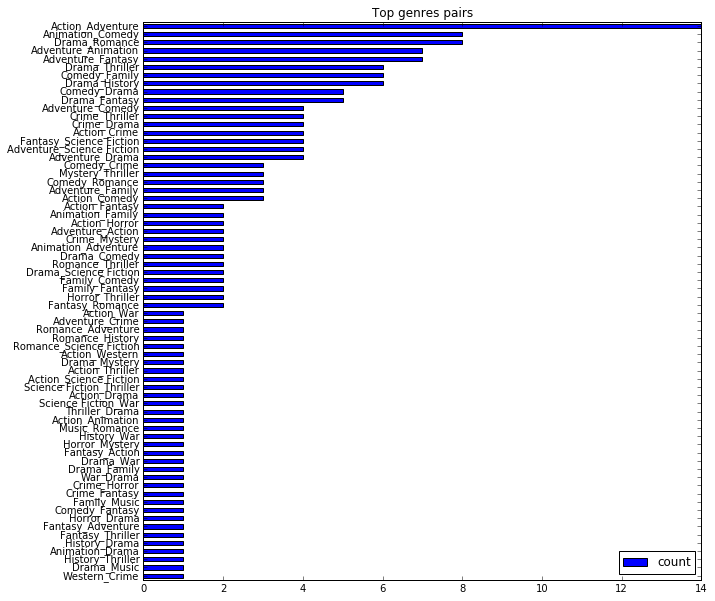

In [21]:
fig, ax = plt.subplots()
pairs_sum[pairs_sum.iloc[:,0]>=1].sort_values(by=['count'], ascending=True)\
    .plot(ax=ax, kind='barh', figsize = (10,10), title="Top genres pairs")

By looking at the genres, we can see that for example:

- romance nearly never comes alone;
- romance/comedy and romance/drama seem to be important pairs;
- crime is often paired with thriller/drama or action;
- horror is often paired with thriller.

We should dig a bit more into the following aspects of the data:

- let the model estimate each genre against all others;
- try to understand if sequels correlate with the genre;
- try to understand if actors correlate with the genre;
- check if the length of the movie correlates with the genre and how that differs between IMDB and TMDB.
- investigate at some other correlation with the genre: rating, costs, country
- how does the genre relate to the cast?
- is there a temporal trend in genres that (maybe in relation to rating)?

## Chord plot for the genres
We built a dynamic chord plot for the genres out of 400 movies. The plot can't be embedded in the notebook, but it's available here: https://tolkv.github.io/cs109beuteam/chord-chard.html